


## Comprehensive convolutional vs transformer model performance benchmarking
This section allows us to generate the performance benchmarking and scatterplots using the saved convolutional model for test datasets and compares it with the performance of the transformer model



## The code for reproducing the saved model results (and training the corresponding models) can be found in `../code/` directory relative to the current directory


We show in the manuscript that measured and predicted expression for both media (complex and defined) are highly correlated and so all measured and predicted expression shown here is in a single media (complex) for consistency. Re-making the corresponding plots for defined media will lead to equivalent results and conclusions. 

### The defined media test data is availble in this directory in the files suffixed with '_defined_media.csv'

#### Important Note for the Readers : 
- Our test datasets in the manuscript (for example the ones used in Fig. 1b, Extended Data Fig. 1-3, Supplementary Fig. 4, etc. ) are not simply held-out subsets of the training datasets. They are separate test datasets generated as part of completely independent experiments with lower-complexity (~1000 fold lower sequence diversity) libraries than the large-scale training data generation experiments resulting in expression measurements with a low measurement-error. 
- Since the training data and the test data are collected in different experiments, the units of expression are on different unrelated scales (the units are arbitrary units local to experiments and not absolute comparable units across experiments) because of the nature of GPRA/Sort-seq experiments.

<b>The corresponding test data for each panel can be found in this directory along with the saved model predictions </b>





### Imports

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import seaborn as sns
from glob import glob
import matplotlib
import pandas as pd
import scipy
##Matplotlib rc params
# Font family : https://matplotlib.org/tutorials/introductory/customizing.html , http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/ , https://www.dmcdougall.co.uk/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib , https://stackoverflow.com/questions/26106552/matplotlib-style-library-not-updating-when-mplstyle-files-added-deleted , https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html , http://www.jesshamrick.com/2016/04/13/reproducible-plots/ , 
#
from matplotlib import rcParams
rcParams.update(matplotlib.rcParamsDefault)
rcParams['pdf.fonttype'] = 42
sns.set(context = 'paper' , style='ticks' , 
        rc = {
            'figure.autolayout' : True,
            'axes.titlesize' : 8 ,
            'axes.titleweight' :'bold',
            
            'figure.titleweight' : 'bold' ,
            'figure.titlesize' : 8 ,
            
            'axes.labelsize' : 8 ,
            'axes.labelpad' : 2 ,
            'axes.labelweight' : 'bold' , 
            'axes.spines.top' : False,
            'axes.spines.right' : False,
            
            'xtick.labelsize' : 7 ,
            'ytick.labelsize' : 7 ,
            
            'legend.fontsize' : 7 ,
            'figure.figsize' : (3.5, 3.5/1.6 ) ,          
            
            'xtick.direction' : 'out' ,
            'ytick.direction' : 'out' ,
            
            'xtick.major.size' : 2 ,
            'ytick.major.size' : 2 ,
            
            'xtick.major.pad' : 2,
            'ytick.major.pad' : 2,
            
            #'lines.linewidth' : 1            
            
             } )



In this section, we reconstruct each figure panel in our paper where the GPU model was used using the GPU model's predictions and show it side-by-side with the TPU model's predictions. This demonstrates the equivalent performance of the GPU and the TPU models :

- Fig. 1d (GA design)
- Fig. 2a-c (Drift)
- Fig. 2d (Gini)
- Fig. 2e-g (SSWM)


- Additionally, we recreate the Random Test Data and Native Test Data scatterplots in complex media using the GPU model below.
- Finally, we recreate the Random Test Data and Native Test Data scatterplots in defined media using the GPU model as well.

All of the results can be reproduced directly from the saved GPU models made available in the corresponding directory as well to show equivalent performance.

We show in the manuscript that measured and predicted expression for both media (complex and defined) are highly correlated and so all measured and predicted expression shown here is in a single media (complex) for consistency. Re-making all of the corresponding plots for defined media will lead to equivalent results and conclusions. This is available in the Extended Data Fig. 1-3.


### ( Random Test) (complex media)

#### Load Results

In [3]:
gpu_results_df = pd.read_csv('Random_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('Random_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

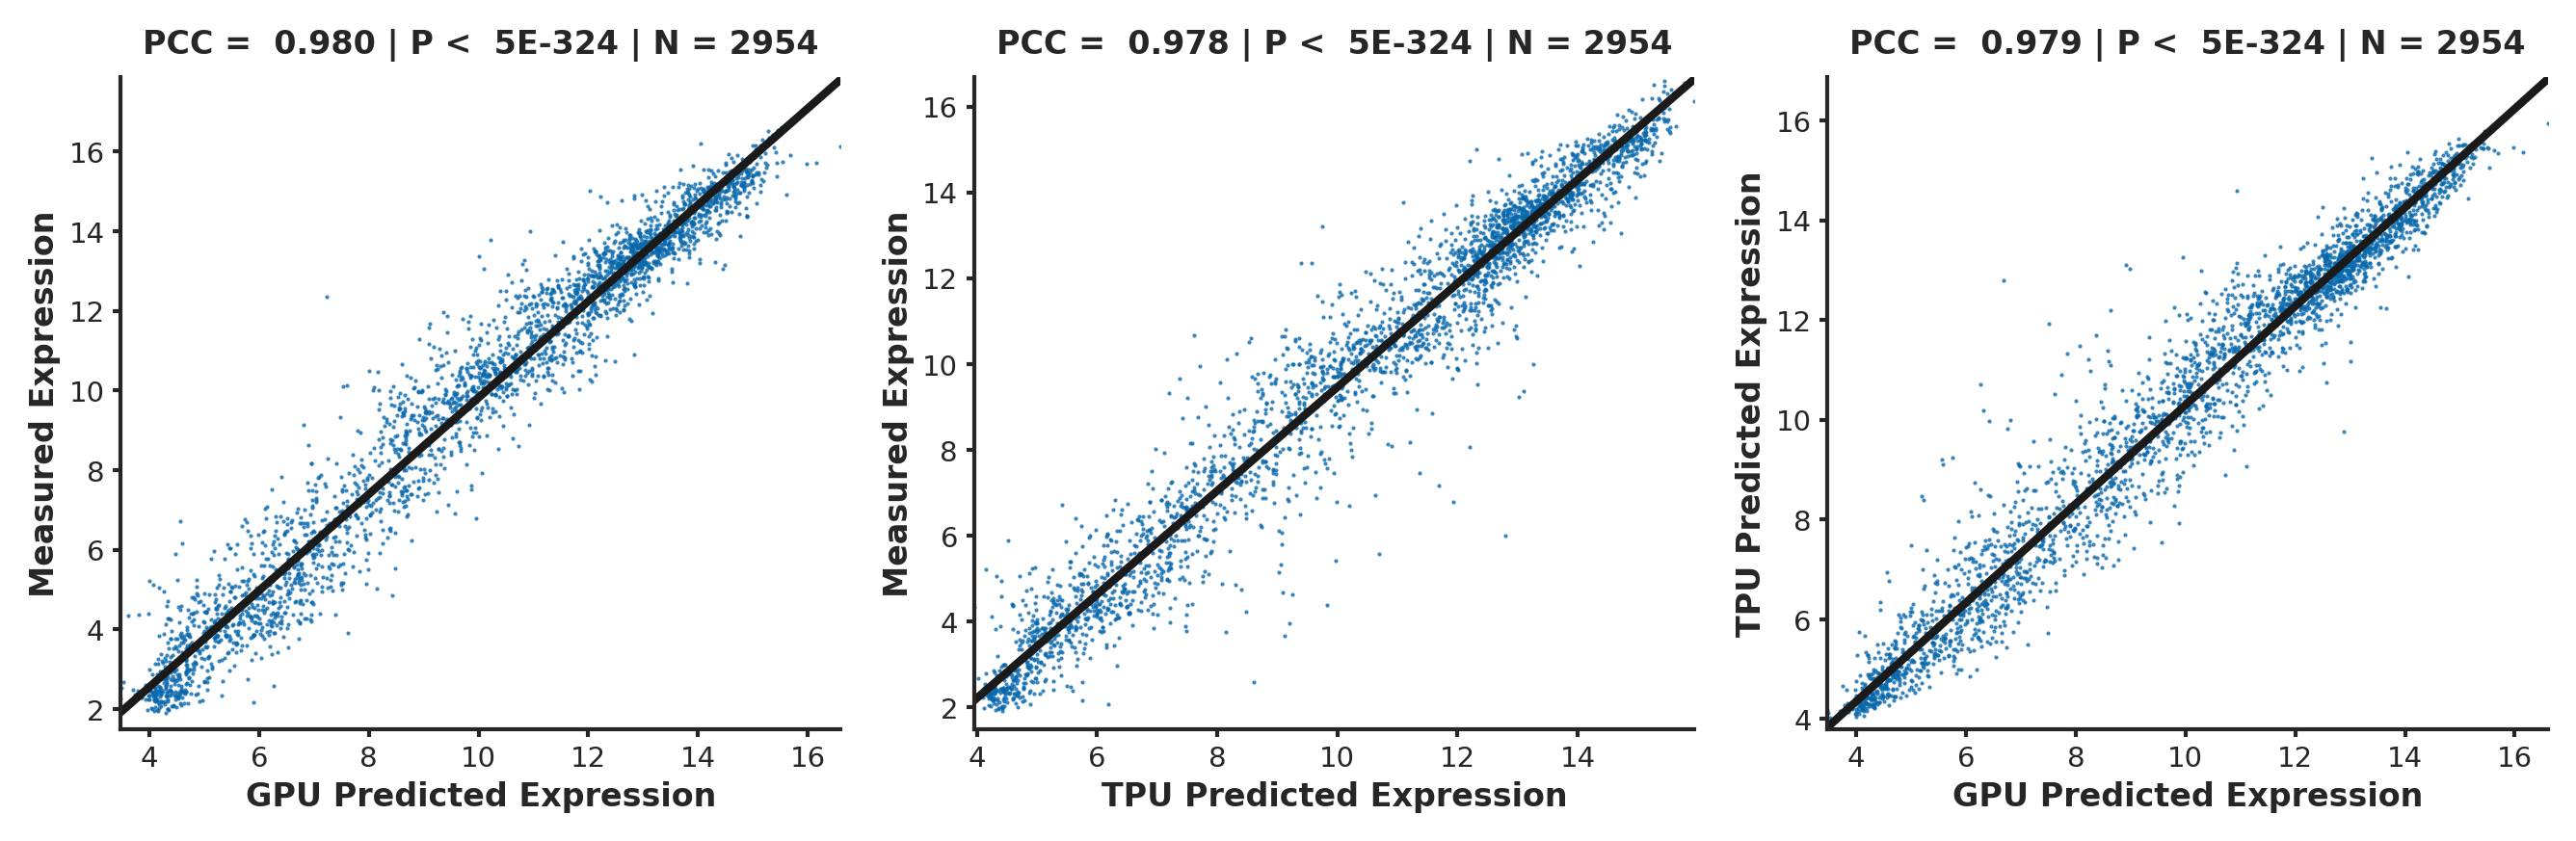

In [4]:

fig_name = 'Random_test_complex'

fig_file = fig_name+"_performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()


### Fig. 1c ( Native test) (complex media)

#### Load Results

In [5]:
gpu_results_df = pd.read_csv('Native_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('Native_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

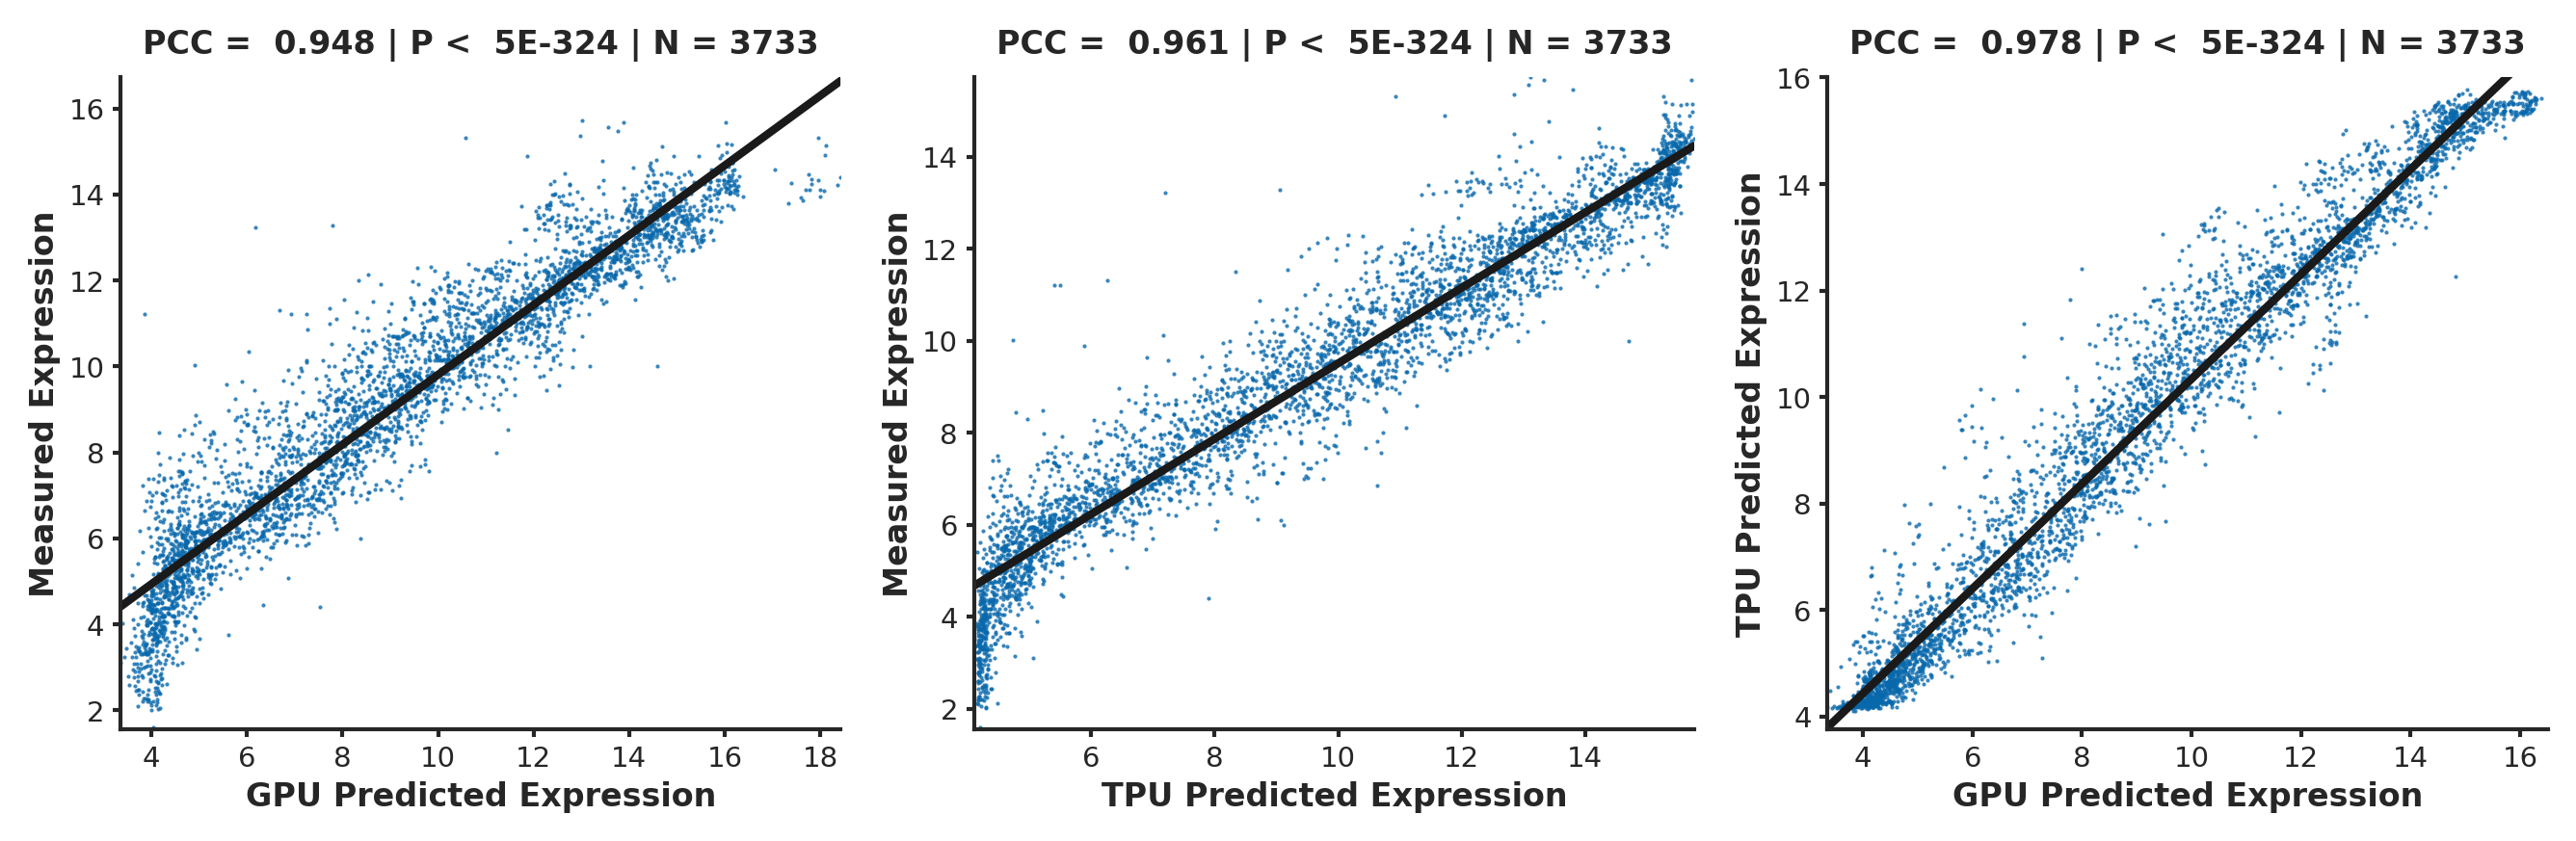

In [6]:

fig_name = 'Random_test_native_complex'

fig_file = fig_name+" _performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax.set_xlim(xmax = 16.5)
ax.set_ylim(ymax = 16)



plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()

### Fig. 1d (GA design)
- This is simply a scatterplots comparing the measured expression and predicted expression for the genetic algorithm designed sequences.
- The data is concentrated at the ends of the expression spectrum because that was the goal of this genetic algorithm design experiment.

#### Load Results

In [7]:
gpu_results_df = pd.read_csv('ga_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('ga_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

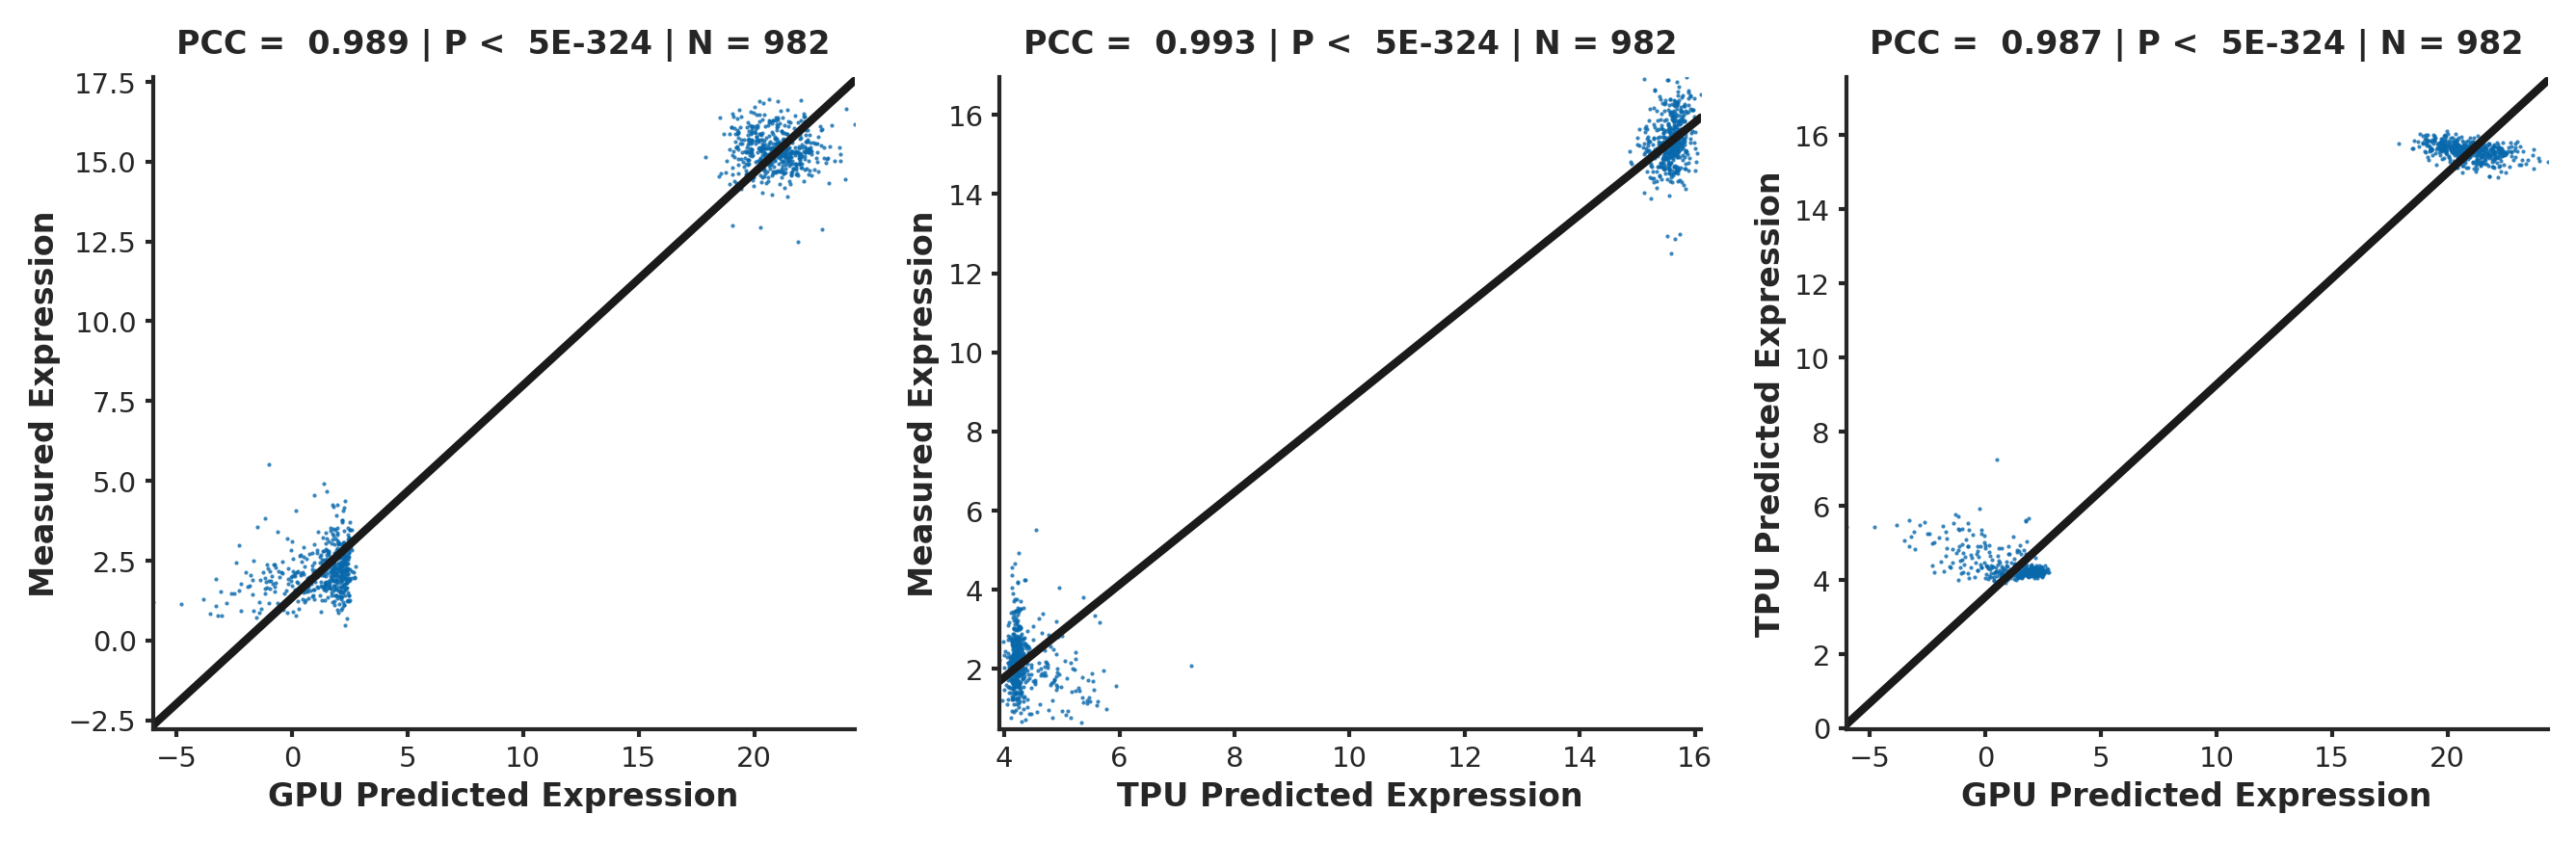

In [8]:

fig_name = 'GA'

fig_file = fig_name+" _performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)





plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()


### Fig. 2a-c (Drift)

#### Load Results

In [9]:
gpu_results_df = pd.read_csv('Drift_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('Drift_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

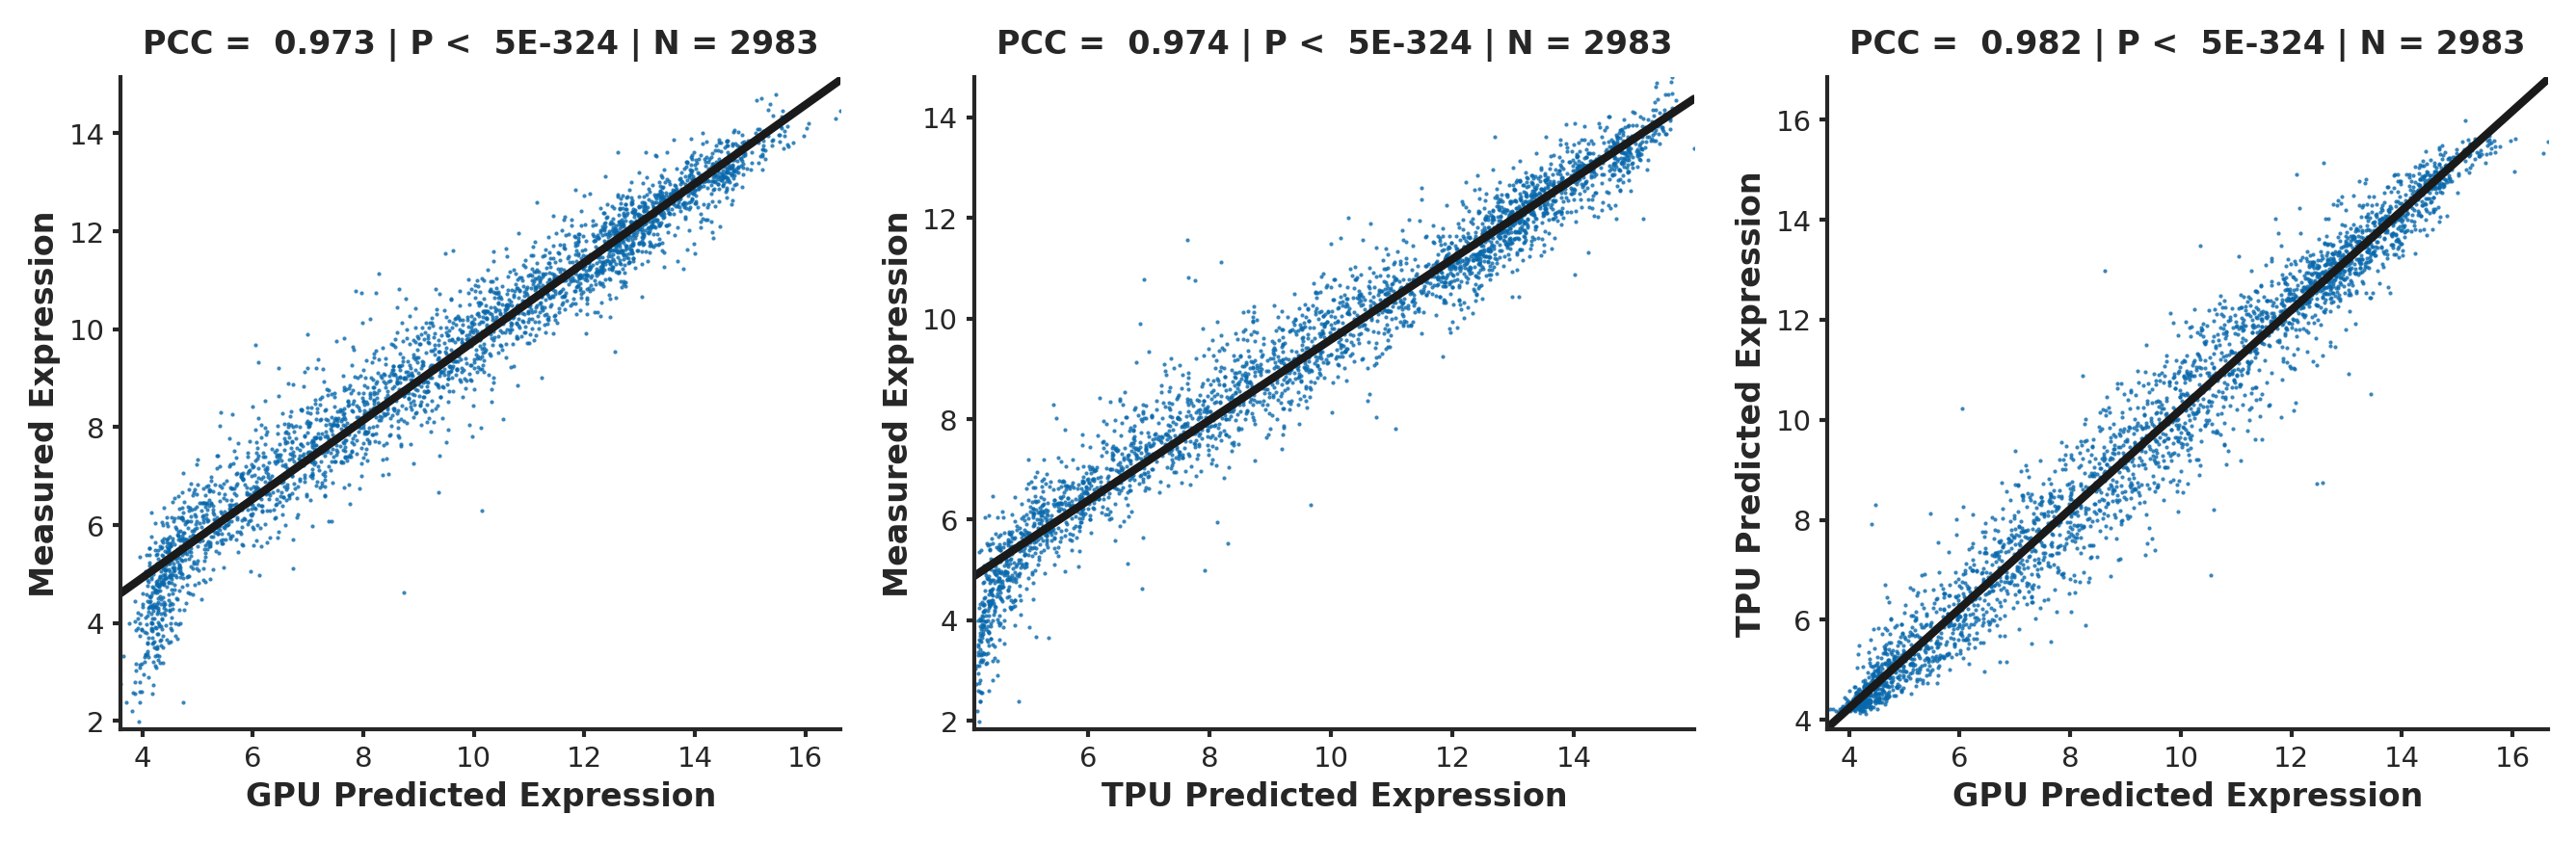

In [10]:

fig_name = 'Drift_'

fig_file = fig_name+" performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()


### Fig. 2d (Gini)

### Please note that the scatterplot below shows the results at an expression conservation threshold of 2. 

### The manuscript shows all tresholds (including unfiltered sequences) in Supplementary Figure 11.

#### Load Results

In [11]:
gpu_results_df = pd.read_csv('Gini_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('Gini_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

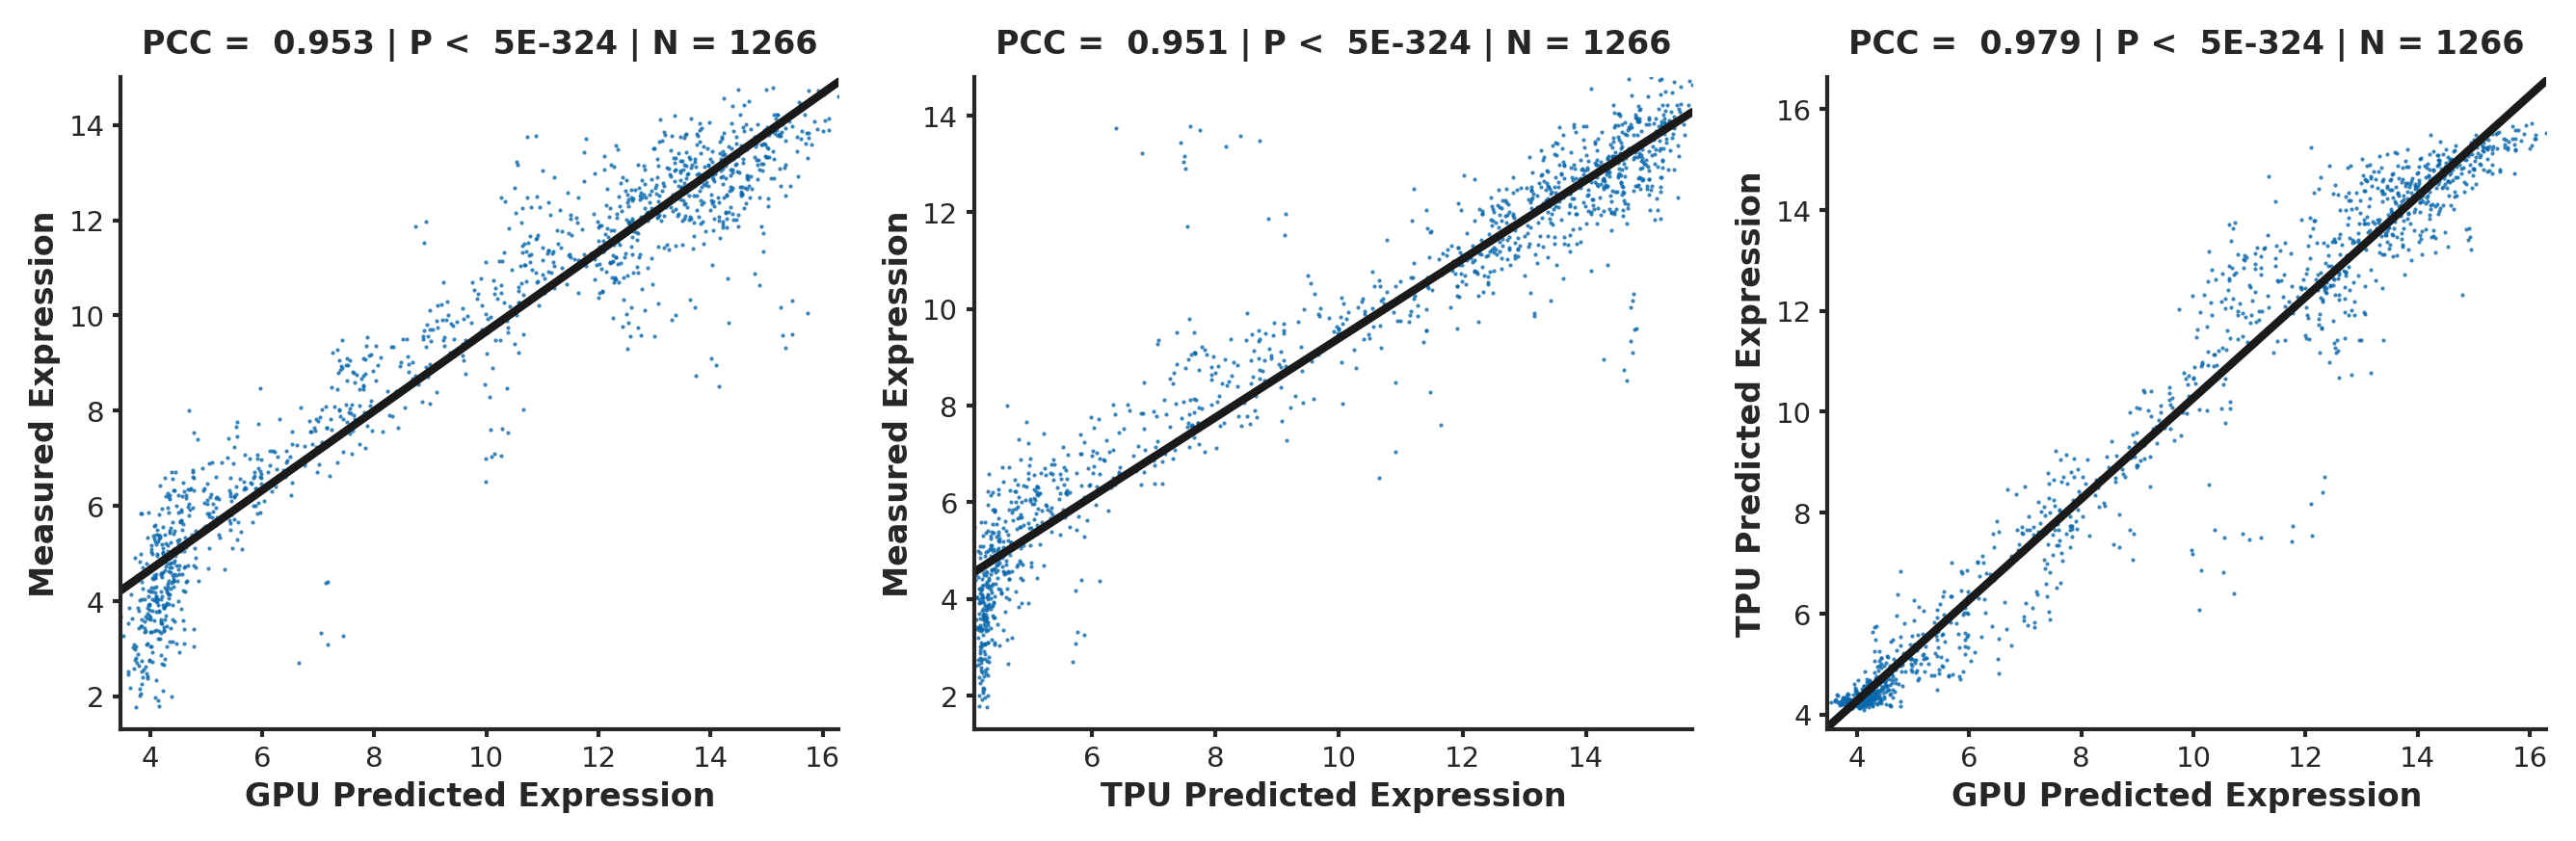

In [12]:

fig_name = 'Gini'

fig_file = fig_name+" _performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()


### Fig. 2e-f (SSWM)

#### Load Results

In [13]:
gpu_results_df = pd.read_csv('SSWM_test_gpu_model.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('SSWM_test_tpu_model.csv', sep =',' , index_col = 0)
reg = 1 ### Flag for turning on regression plot

#### Generate plots

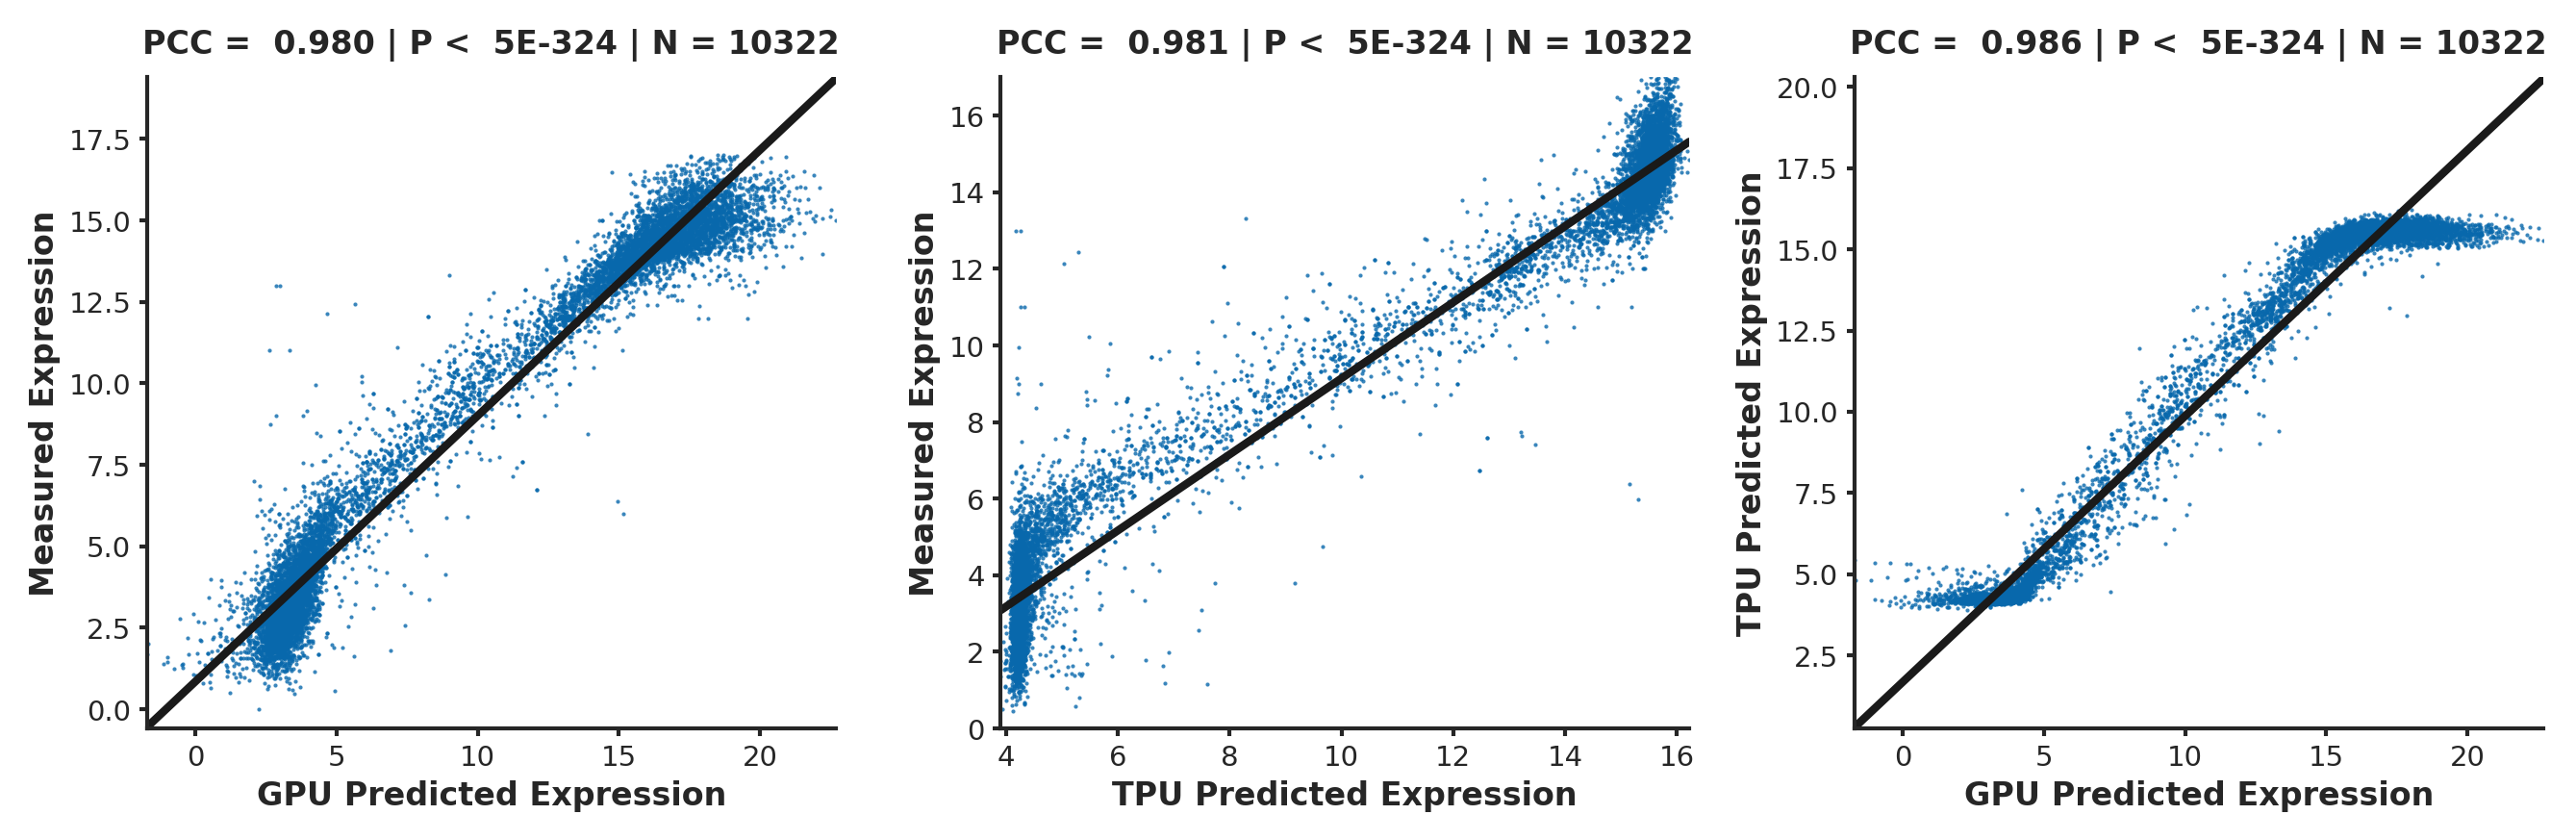

In [14]:

fig_name = 'SSWM'

fig_file = fig_name+" _performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()


Note here that the right most panel on the plot above (TPU vs GPU for SSWM) shows the different ways the two models handle data at the extreme range of expression. The TPU model's predictions remain tightly within the range of measured data while the GPU model's predictions at the extremes can go beyond the range of the measured data.
We designed this experiment using the GPU model and since the expression saturates within a few mutations as we have shown experimentally and using simulations, the last few sequences remained in the last bin (at the end of the range of measurable expression). The GPU model did not learn to truncate the data to stay within the range of the experiment unlike the TPU model. 
Regardless, the Pearson's r between the predictions and measurements for both models remains very high (and so does the correlation between the predictions). 

### ED Fig. 1a ( Random test) Defined

#### Load Results

In [15]:
gpu_results_df = pd.read_csv('Random_test_gpu_model_defined_media.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('../code/referee_response/reproduce_test_data_performance/Random_defined.csv', sep =',' , index_col = 0)
#tpu_results_df['Measured Expression'] = tpu_results_df['meanEL'] 
#tpu_results_df['Predicted Expression'] = tpu_results_df['edvPred'] 
reg = 1 ### Flag for turning on regression plot

#### Generate plots

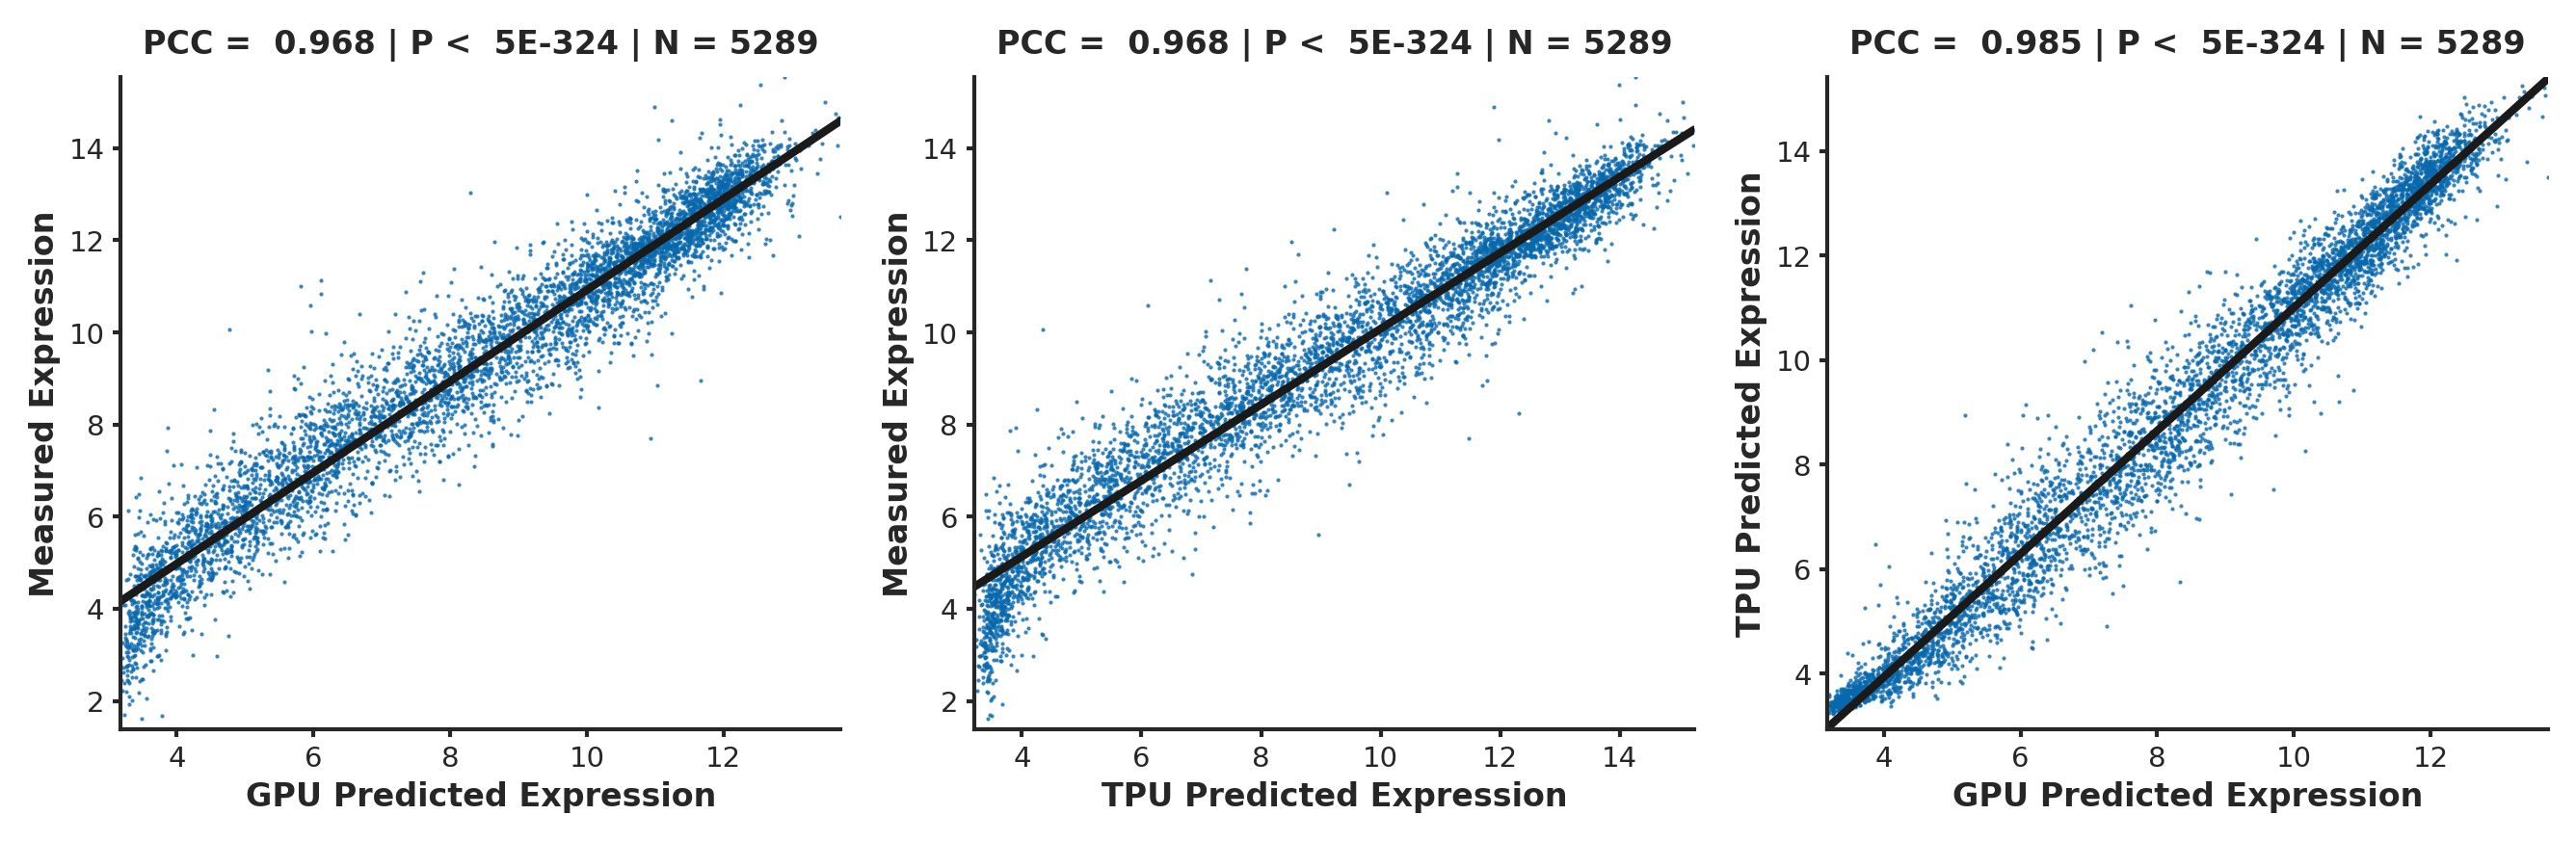

In [16]:

fig_name = 'Random_test_defined_media'

fig_file = fig_name+"_performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()

### ED Fig. 1b ( Native test) Defined

#### Load Results

In [17]:
gpu_results_df = pd.read_csv('Native_test_gpu_model_defined_media.csv', sep =',' , index_col = 0)
tpu_results_df = pd.read_csv('Native_testdata_defined_media.csv', sep =',' , index_col = 0)
tpu_results_df['Measured Expression'] = tpu_results_df['meanEL'] 
tpu_results_df['Predicted Expression'] = tpu_results_df['edvPred'] 
reg = 1 ### Flag for turning on regression plot

#### Generate plots

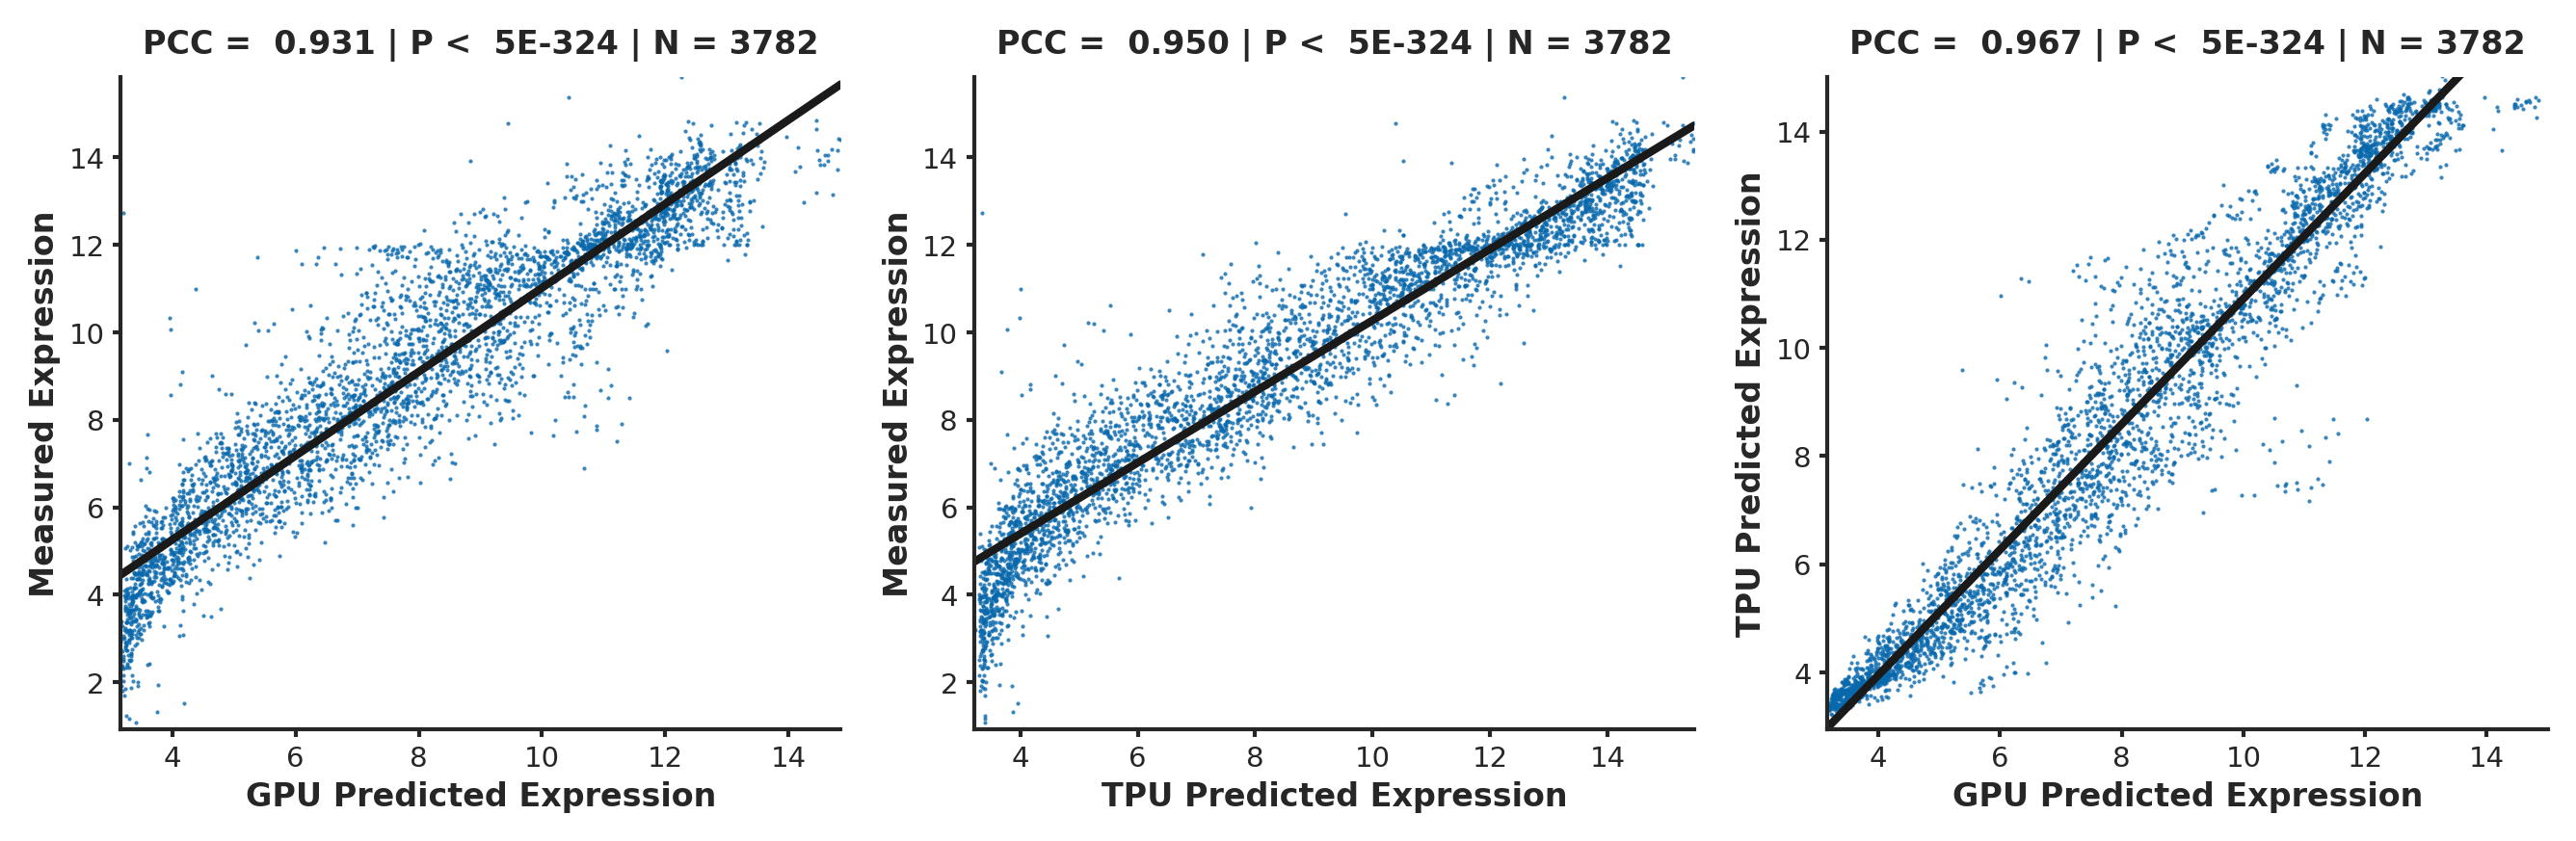

In [18]:

fig_name = 'Native_test_defined_media'

fig_file = fig_name+" gpu_performance"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)

#############################################################
### GPU vs Measured
plt.subplot(1,3,1)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(gpu_results_df['Measured Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


#############################################################
### TPU vs Measured
plt.subplot(1,3,2)

x = list(tpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Measured Expression'].values)

xlabel = 'TPU Predicted Expression'
ylabel = 'Measured Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



#############################################################
### GPU vs TPU predictions
plt.subplot(1,3,3)

x = list(gpu_results_df['Predicted Expression'].values)
y = list(tpu_results_df['Predicted Expression'].values)

xlabel = 'GPU Predicted Expression'
ylabel = 'TPU Predicted Expression'


r = scipy.stats.pearsonr(x ,y )
if reg: 
    sns.regplot(x=x ,y=y ,
                scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
                line_kws= {'linewidth':2} ,
               color= '#0868ac', robust = 1 )
else : 
    sns.scatterplot(x=x ,y=y ,s=1,linewidth=0, rasterized=True , color= '#0868ac')

ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax.set_xlim(xmax = 15)
ax.set_ylim(ymax = 15)


plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()